In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [5]:
path = '../../Project-1_Resources/clean_data.csv'

df = pd.read_csv(path, low_memory=False)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.fillna('')
df[['MONTH','DAY','YEAR']] = df.RECVDATE.str.split("/",expand=True)
df = df.drop(['MONTH', 'DAY'], axis=1)

df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,NUMDAYS,FORM_VERS,OFC_VISIT,ER_ED_VISIT,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,YEAR
0,413802,01/01/2011,CO,13,F,,,,Y,,...,44,1,,,,01/01/2011,HPV4,MERCK & CO. INC.,UNK,2011
1,413803,01/01/2011,TN,67,F,,,,,,...,0,1,,,,01/01/2011,FLU3,CSL LIMITED,UNK,2011
2,413804,01/01/2011,MN,62,F,,,,,,...,0,1,,,,01/01/2011,PPV,UNKNOWN MANUFACTURER,1,2011
3,413808,01/01/2011,WA,65,F,,,,,,...,1801,1,,,,01/01/2011,VARZOS,MERCK & CO. INC.,UNK,2011
4,413830,01/01/2011,TN,76,M,,,,,Y,...,9,1,,,,12/28/2010,FLU3,NOVARTIS VACCINES AND DIAGNOSTICS,UNK,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603024,1442854,07/02/2021,FL,17,F,,,,,,...,0,2,,,,07/02/2021,COVID19,PFIZER\BIONTECH,2,2021
603025,1442855,07/02/2021,RI,52,F,,,,,,...,88,2,Y,,chlorhexidine scrub (rash),07/02/2021,COVID19,PFIZER\BIONTECH,1,2021
603026,1442856,07/02/2021,CA,37,F,,,,,,...,0,2,,,,07/02/2021,COVID19,PFIZER\BIONTECH,1,2021
603027,1442857,07/02/2021,DE,69,F,,,,,Y,...,4,2,Y,,None known,07/02/2021,COVID19,PFIZER\BIONTECH,2,2021


In [6]:
# Column list
print(df.columns.values.tolist())

['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'NUMDAYS', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'REPORT_DATE', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'YEAR']


In [7]:
# Create chart: cumulative deaths per vaccine type per year

# Filter data for only rows with deaths reported
died_df = df.loc[df['DIED']=='Y']

# Sum all deaths for vaccines other than COVID, grouped by year - should be two
# columns - 'COVID19' & "Other" - and a column of years from 2011 to 2021

# Look up all rows that do not contain COVID19 as the vax_type, group by year, & count rows for each year
other_deaths = died_df.loc[died_df['VAX_TYPE']!='COVID19'].groupby(['YEAR'])['DIED'].count() 

# Look up all rows that do contain COVID19 as the vax_type, group by year, & count rows for each year
covid_deaths = died_df.loc[died_df['VAX_TYPE']=='COVID19'].groupby(['YEAR'])['DIED'].count()

# Create data frame
deaths_df = pd.DataFrame({'COVID-19':covid_deaths, 'All Other Vaccines': other_deaths}).fillna(0).astype(int)
deaths_df

,COVID-19,All Other Vaccines
2011,0,62
2012,0,60
2013,0,54
2014,0,59
2015,0,58
2016,0,61
2017,0,24
2018,0,44
2019,0,55
2020,16,38


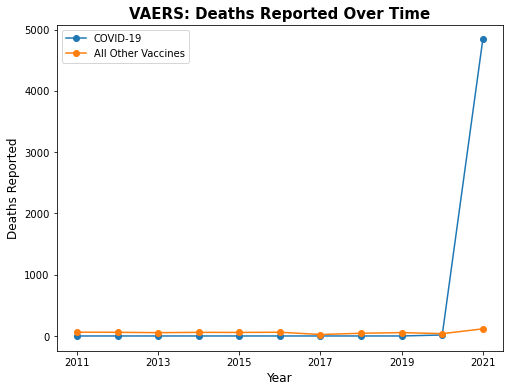

In [25]:
# Create line plot
deaths_df.plot(kind='line', rot='horizontal', marker='o', figsize=(8,6))
plt.xlabel("Year",size=12)
plt.ylabel("Deaths Reported",size=12)
plt.title("VAERS: Deaths Reported Over Time", fontdict={'fontsize':15,'fontweight':'semibold'})

# Save the fig generated
plt.savefig('vax_deaths.png')

In [26]:
# Create chart: cumulative disabilities per vaccine type per year

# Filter data for only rows with disabilities reported
disable_df = df.loc[df['DISABLE']=='Y']

# Sum all disabilities for vaccines other than COVID, grouped by year - should be two
# columns - 'COVID19' & "Other" - and a column of years from 2011 to 2021

# Look up all rows that do not contain COVID19 as the vax_type, group by year, & count rows for each year
other_disable = disable_df.loc[disable_df['VAX_TYPE']!='COVID19'].groupby(['YEAR'])['DISABLE'].count()

# Look up all rows that do contain COVID19 as the vax_type, group by year, & count rows for each year
covid_disable = disable_df.loc[disable_df['VAX_TYPE']=='COVID19'].groupby(['YEAR'])['DISABLE'].count()

# Create data frame
disabled_df = pd.DataFrame({'COVID-19':covid_disable, 'All Other Vaccines': other_disable}).fillna(0).astype(int)
disabled_df

,COVID-19,All Other Vaccines
2011,0,254
2012,0,246
2013,0,236
2014,0,325
2015,0,313
2016,0,335
2017,0,369
2018,0,480
2019,0,502
2020,11,448


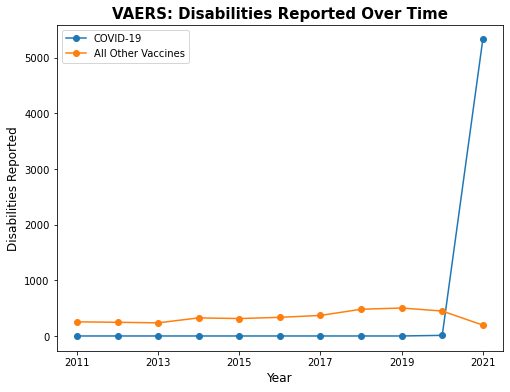

In [29]:
# Create line plot
disabled_df.plot(kind='line', rot='horizontal', marker='o', figsize=(8,6))
plt.xlabel("Year",size=12)
plt.ylabel("Disabilities Reported",size=12)
plt.title("VAERS: Disabilities Reported Over Time", fontdict={'fontsize':15,'fontweight':'semibold'})

# Save the fig generated
plt.savefig('vax_disabilities.png')

In [30]:
# Create chart: cumulative life-threatening illnesses per vaccine type per year

# Filter data for only rows with life-threatening illness reported
Lthreat_df = df.loc[df['L_THREAT']=='Y']

# Sum all life-threatening illness for vaccines other than COVID, grouped by year - should be two
# columns - 'COVID19' & "Other" - and a column of years from 2011 to 2021

# Look up all rows that do not contain COVID19 as the vax_type, group by year, & count rows for each year
other_Lthreat = Lthreat_df.loc[Lthreat_df['VAX_TYPE']!='COVID19'].groupby(['YEAR'])['L_THREAT'].count() 

# Look up all rows that do contain COVID19 as the vax_type, group by year, & count rows for each year
covid_Lthreat = Lthreat_df.loc[Lthreat_df['VAX_TYPE']=='COVID19'].groupby(['YEAR'])['L_THREAT'].count()

# Create data frame
L_threat_df = pd.DataFrame({'COVID-19':covid_Lthreat, 'All Other Vaccines': other_Lthreat}).fillna(0).astype(int)
L_threat_df

,COVID-19,All Other Vaccines
2011,0,268
2012,0,266
2013,0,287
2014,0,282
2015,0,278
2016,0,294
2017,0,196
2018,0,190
2019,0,183
2020,67,146


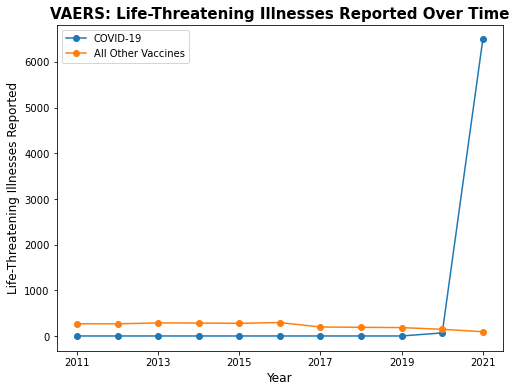

In [31]:
# Create line plot
L_threat_df.plot(kind='line', rot='horizontal', marker='o', figsize=(8,6))
plt.xlabel("Year",size=12)
plt.ylabel("Life-Threatening Illnesses Reported",size=12)
plt.title("VAERS: Life-Threatening Illnesses Reported Over Time", fontdict={'fontsize':15,'fontweight':'semibold'})

# Save the fig generated
plt.savefig('vax_Lthreat.png')